In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\..\.vscode\posco_analysis'))
	print(os.getcwd())
except:
	pass


In [91]:
#다중회귀분석
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 
import statsmodels.api as sm
from sklearn.preprocessing import scale,robust_scale,minmax_scale
#다중공정성 패키지
from statsmodels.stats.outliers_influence import variance_inflation_factor
#sklearn 선형회귀 모형 :변수선택법
from sklearn.linear_model import LinearRegression
#변수 선택법: 후진제거법
from sklearn.feature_selection import RFE
# 데이터 스케일
from sklearn.preprocessing import scale


In [92]:
df_health = pd.read_csv("data/체질검사.csv",engine='python')
df_health.head()
# 결측치 확인
df_health.isnull().sum()


FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
dtype: int64

In [93]:
# 키와 몸무게 수정
df_health['WEIGHT'] = df_health.WEIGHT * 0.45
df_health.HEIGHT = df_health.HEIGHT*0.0254


In [94]:
# df_health에 BMI 추가
df_health["BMI"] = df_health['WEIGHT'] / (df_health['HEIGHT']*df_health['HEIGHT'])

In [95]:
def scatter_g(feature):
    sns.scatterplot(x = feature,y = "FAT",data = df_health ,marker = 'x')  


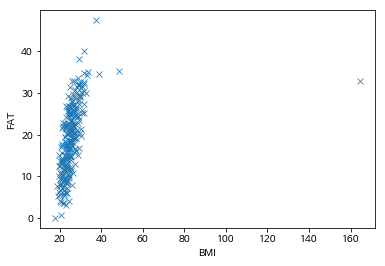

In [96]:
# BMI와 FAT간의 산포도 분석하기
scatter_g('BMI')

# 이상치 제거
df_health.drop(df_health[df_health.BMI>45].index,inplace = True)


In [97]:
df_health.corr().round(3)


,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.295,0.617,-0.029,0.489,0.701,0.824,0.633,0.549,0.492,0.245,0.482,0.365,0.339,0.745
AGE,0.295,1.000,-0.016,-0.246,0.119,0.182,0.243,-0.058,-0.216,0.017,-0.110,-0.044,-0.085,0.218,0.124
WEIGHT,0.617,-0.016,1.000,0.513,0.810,0.891,0.874,0.933,0.852,0.843,0.581,0.785,0.683,0.725,0.867
HEIGHT,-0.029,-0.246,0.513,1.000,0.325,0.224,0.187,0.397,0.350,0.513,0.395,0.319,0.322,0.397,0.022
NECK,0.489,0.119,0.810,0.325,1.000,0.769,0.728,0.708,0.669,0.648,0.434,0.709,0.661,0.731,0.752
CHEST,0.701,0.182,0.891,0.224,0.769,1.000,0.910,0.825,0.708,0.698,0.447,0.707,0.599,0.644,0.911
ABDOMEN,0.824,0.243,0.874,0.187,0.728,0.910,1.000,0.861,0.737,0.710,0.407,0.656,0.530,0.602,0.914
HIP,0.633,-0.058,0.933,0.397,0.708,0.825,0.861,1.000,0.881,0.809,0.521,0.722,0.603,0.626,0.861
THIGH,0.549,-0.216,0.852,0.350,0.669,0.708,0.737,0.881,1.000,0.777,0.504,0.744,0.604,0.544,0.787
KNEE,0.492,0.017,0.843,0.513,0.648,0.698,0.710,0.809,0.777,1.000,0.585,0.654,0.579,0.656,0.679


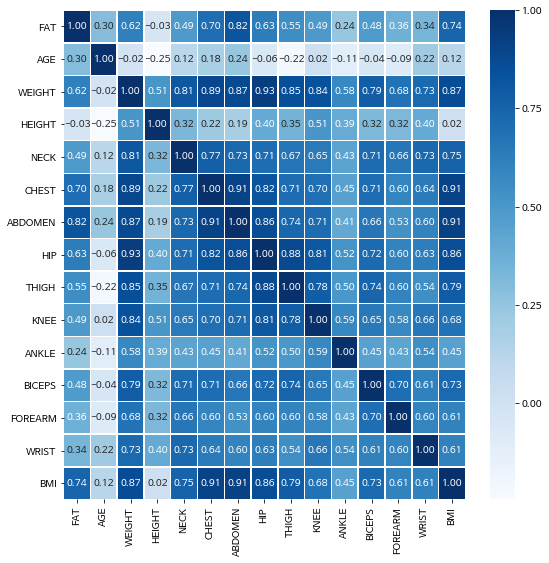

In [98]:
# 변수간의 상관관계 분석_HEATMAP
# 이상치를 지우니 BMI와FAT과의 상관도가 올라갔다.
plt.figure(figsize=(9,9))
sns.heatmap(df_health.corr(), annot=True,fmt = '.2f', linewidths=.5, cmap='Blues')


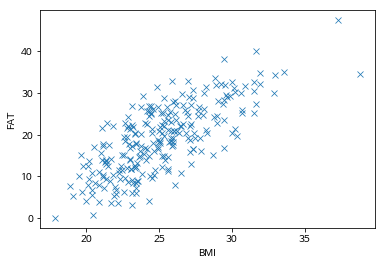

In [99]:
# BMI와 FAT간의 산포도 분석하기
scatter_g('BMI')

# 이상치 제거
df_health.drop(df_health[df_health.BMI>45].index,inplace = True)


In [100]:
df_health.corr().round(3)


,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.295,0.617,-0.029,0.489,0.701,0.824,0.633,0.549,0.492,0.245,0.482,0.365,0.339,0.745
AGE,0.295,1.000,-0.016,-0.246,0.119,0.182,0.243,-0.058,-0.216,0.017,-0.110,-0.044,-0.085,0.218,0.124
WEIGHT,0.617,-0.016,1.000,0.513,0.810,0.891,0.874,0.933,0.852,0.843,0.581,0.785,0.683,0.725,0.867
HEIGHT,-0.029,-0.246,0.513,1.000,0.325,0.224,0.187,0.397,0.350,0.513,0.395,0.319,0.322,0.397,0.022
NECK,0.489,0.119,0.810,0.325,1.000,0.769,0.728,0.708,0.669,0.648,0.434,0.709,0.661,0.731,0.752
CHEST,0.701,0.182,0.891,0.224,0.769,1.000,0.910,0.825,0.708,0.698,0.447,0.707,0.599,0.644,0.911
ABDOMEN,0.824,0.243,0.874,0.187,0.728,0.910,1.000,0.861,0.737,0.710,0.407,0.656,0.530,0.602,0.914
HIP,0.633,-0.058,0.933,0.397,0.708,0.825,0.861,1.000,0.881,0.809,0.521,0.722,0.603,0.626,0.861
THIGH,0.549,-0.216,0.852,0.350,0.669,0.708,0.737,0.881,1.000,0.777,0.504,0.744,0.604,0.544,0.787
KNEE,0.492,0.017,0.843,0.513,0.648,0.698,0.710,0.809,0.777,1.000,0.585,0.654,0.579,0.656,0.679


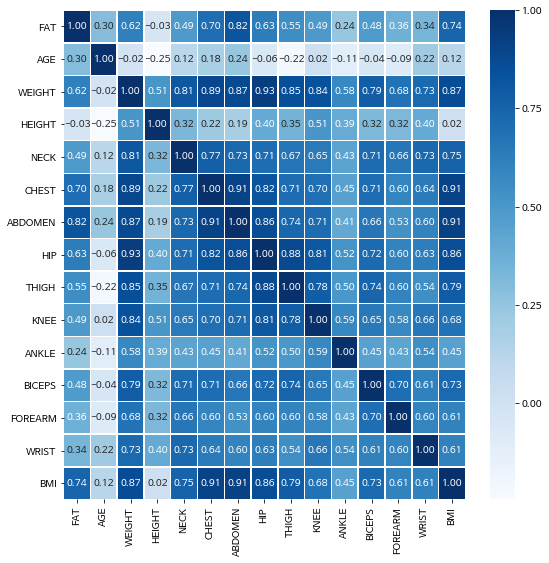

In [101]:
# 변수간의 상관관계 분석_HEATMAP
# 이상치를 지우니 BMI와FAT과의 상관도가 올라갔다.
plt.figure(figsize=(9,9))
sns.heatmap(df_health.corr(), annot=True,fmt = '.2f', linewidths=.5, cmap='Blues')


In [102]:
# 목표변수, 설명변수 역할 지정
df_health_y = df_health['FAT'] # 목표변수
df_health_x = df_health.drop('FAT', axis = 1, inplace = False)

print("목표변수 데이터 크기 : {}".format(df_health_y.shape))
print("설명변수 데이터 크기 : {}".format(df_health_x.shape))


목표변수 데이터 크기 : (250,)
설명변수 데이터 크기 : (250, 14)


In [103]:
#BMI = KG / (신장 * 신장(m))
# df_health_x["HEIGHT"] = df_health_x["HEIGHT"] * 0.0254 # 키수정
# df_health_x["WEIGHT"] = df_health_x["WEIGHT"] * 0.45 # 몸무게 수정
df_health_x["BMI"] = df_health_x['WEIGHT'] / (df_health_x['HEIGHT']*df_health_x['HEIGHT'])
df_health_x.head()



,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
1,27,75.6000,1.80975,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595
2,69,79.9875,1.73990,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478
3,57,66.4875,1.67005,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617
4,51,98.5500,1.62560,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165
5,40,91.0125,1.77800,38.5,106.5,100.9,106.2,63.5,39.9,22.6,35.1,30.6,19.0,28.789726


In [104]:
# BMI와 다중공정성이 의심되는 변수 제거
df_health_x.drop('WEIGHT',axis = 1,inplace = True)
df_health_x.drop('HEIGHT',axis = 1,inplace = True)


In [105]:
# df_health.drop(df_health.index[0],inplace=True)


In [106]:
# 이상치확인(box_plot)
def draw_multivarient_plot(dataset, rows, cols, plot_type):
    column_names=dataset.columns.values
    number_of_column=len(column_names)
    fig, axarr=plt.subplots(rows,cols, figsize=(5*cols,5*rows))

    counter=0
    for i in range(rows):
        for j in range(cols):
            if 'violin' in plot_type:
                sns.violinplot(y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot( y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(y=column_names[counter],data=dataset, ax=axarr[i][j])

            counter+=1
            if counter==(number_of_column-1,):
                break



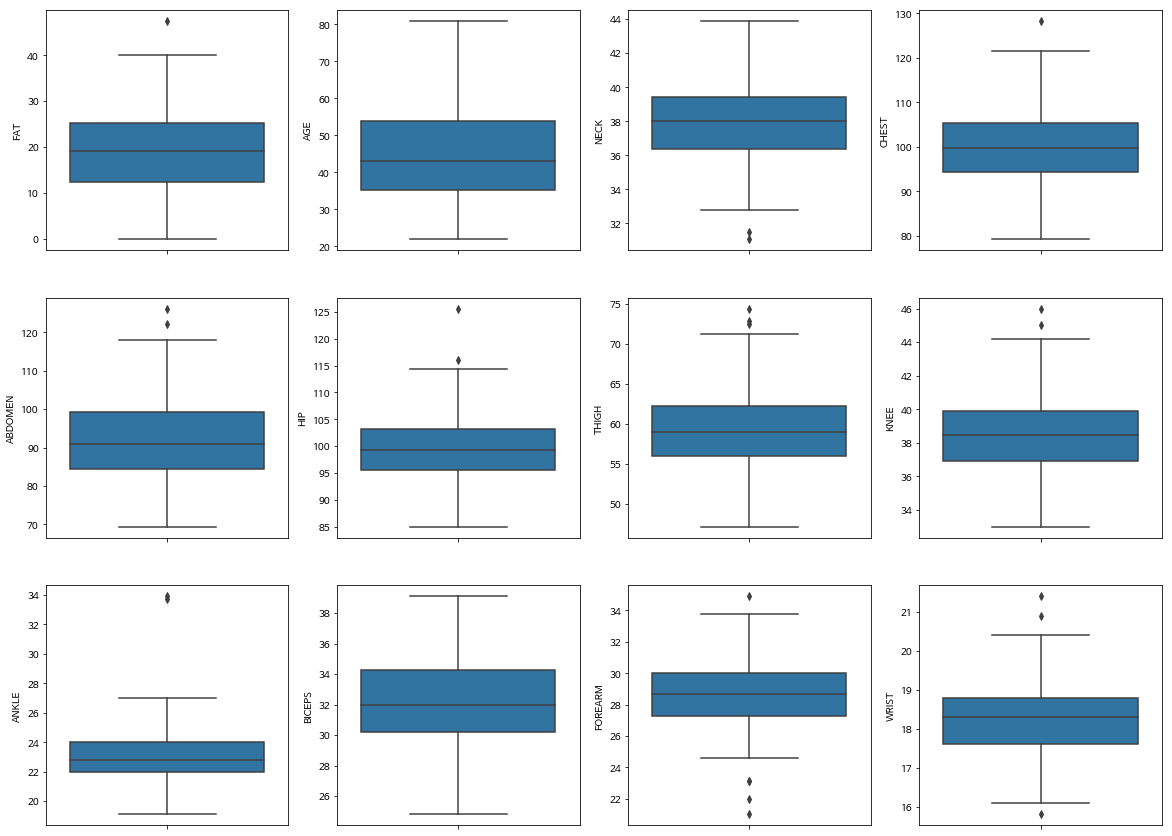

In [107]:
draw_multivarient_plot(df_health.drop(['WEIGHT','HEIGHT'],axis= 1),3,4,"box_plot")


In [108]:
#절편추가
df_health_x_const = sm.add_constant(df_health_x)
df_health_x_const.head()

,const,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
1,1.0,27,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595
2,1.0,69,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478
3,1.0,57,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617
4,1.0,51,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165
5,1.0,40,38.5,106.5,100.9,106.2,63.5,39.9,22.6,35.1,30.6,19.0,28.789726


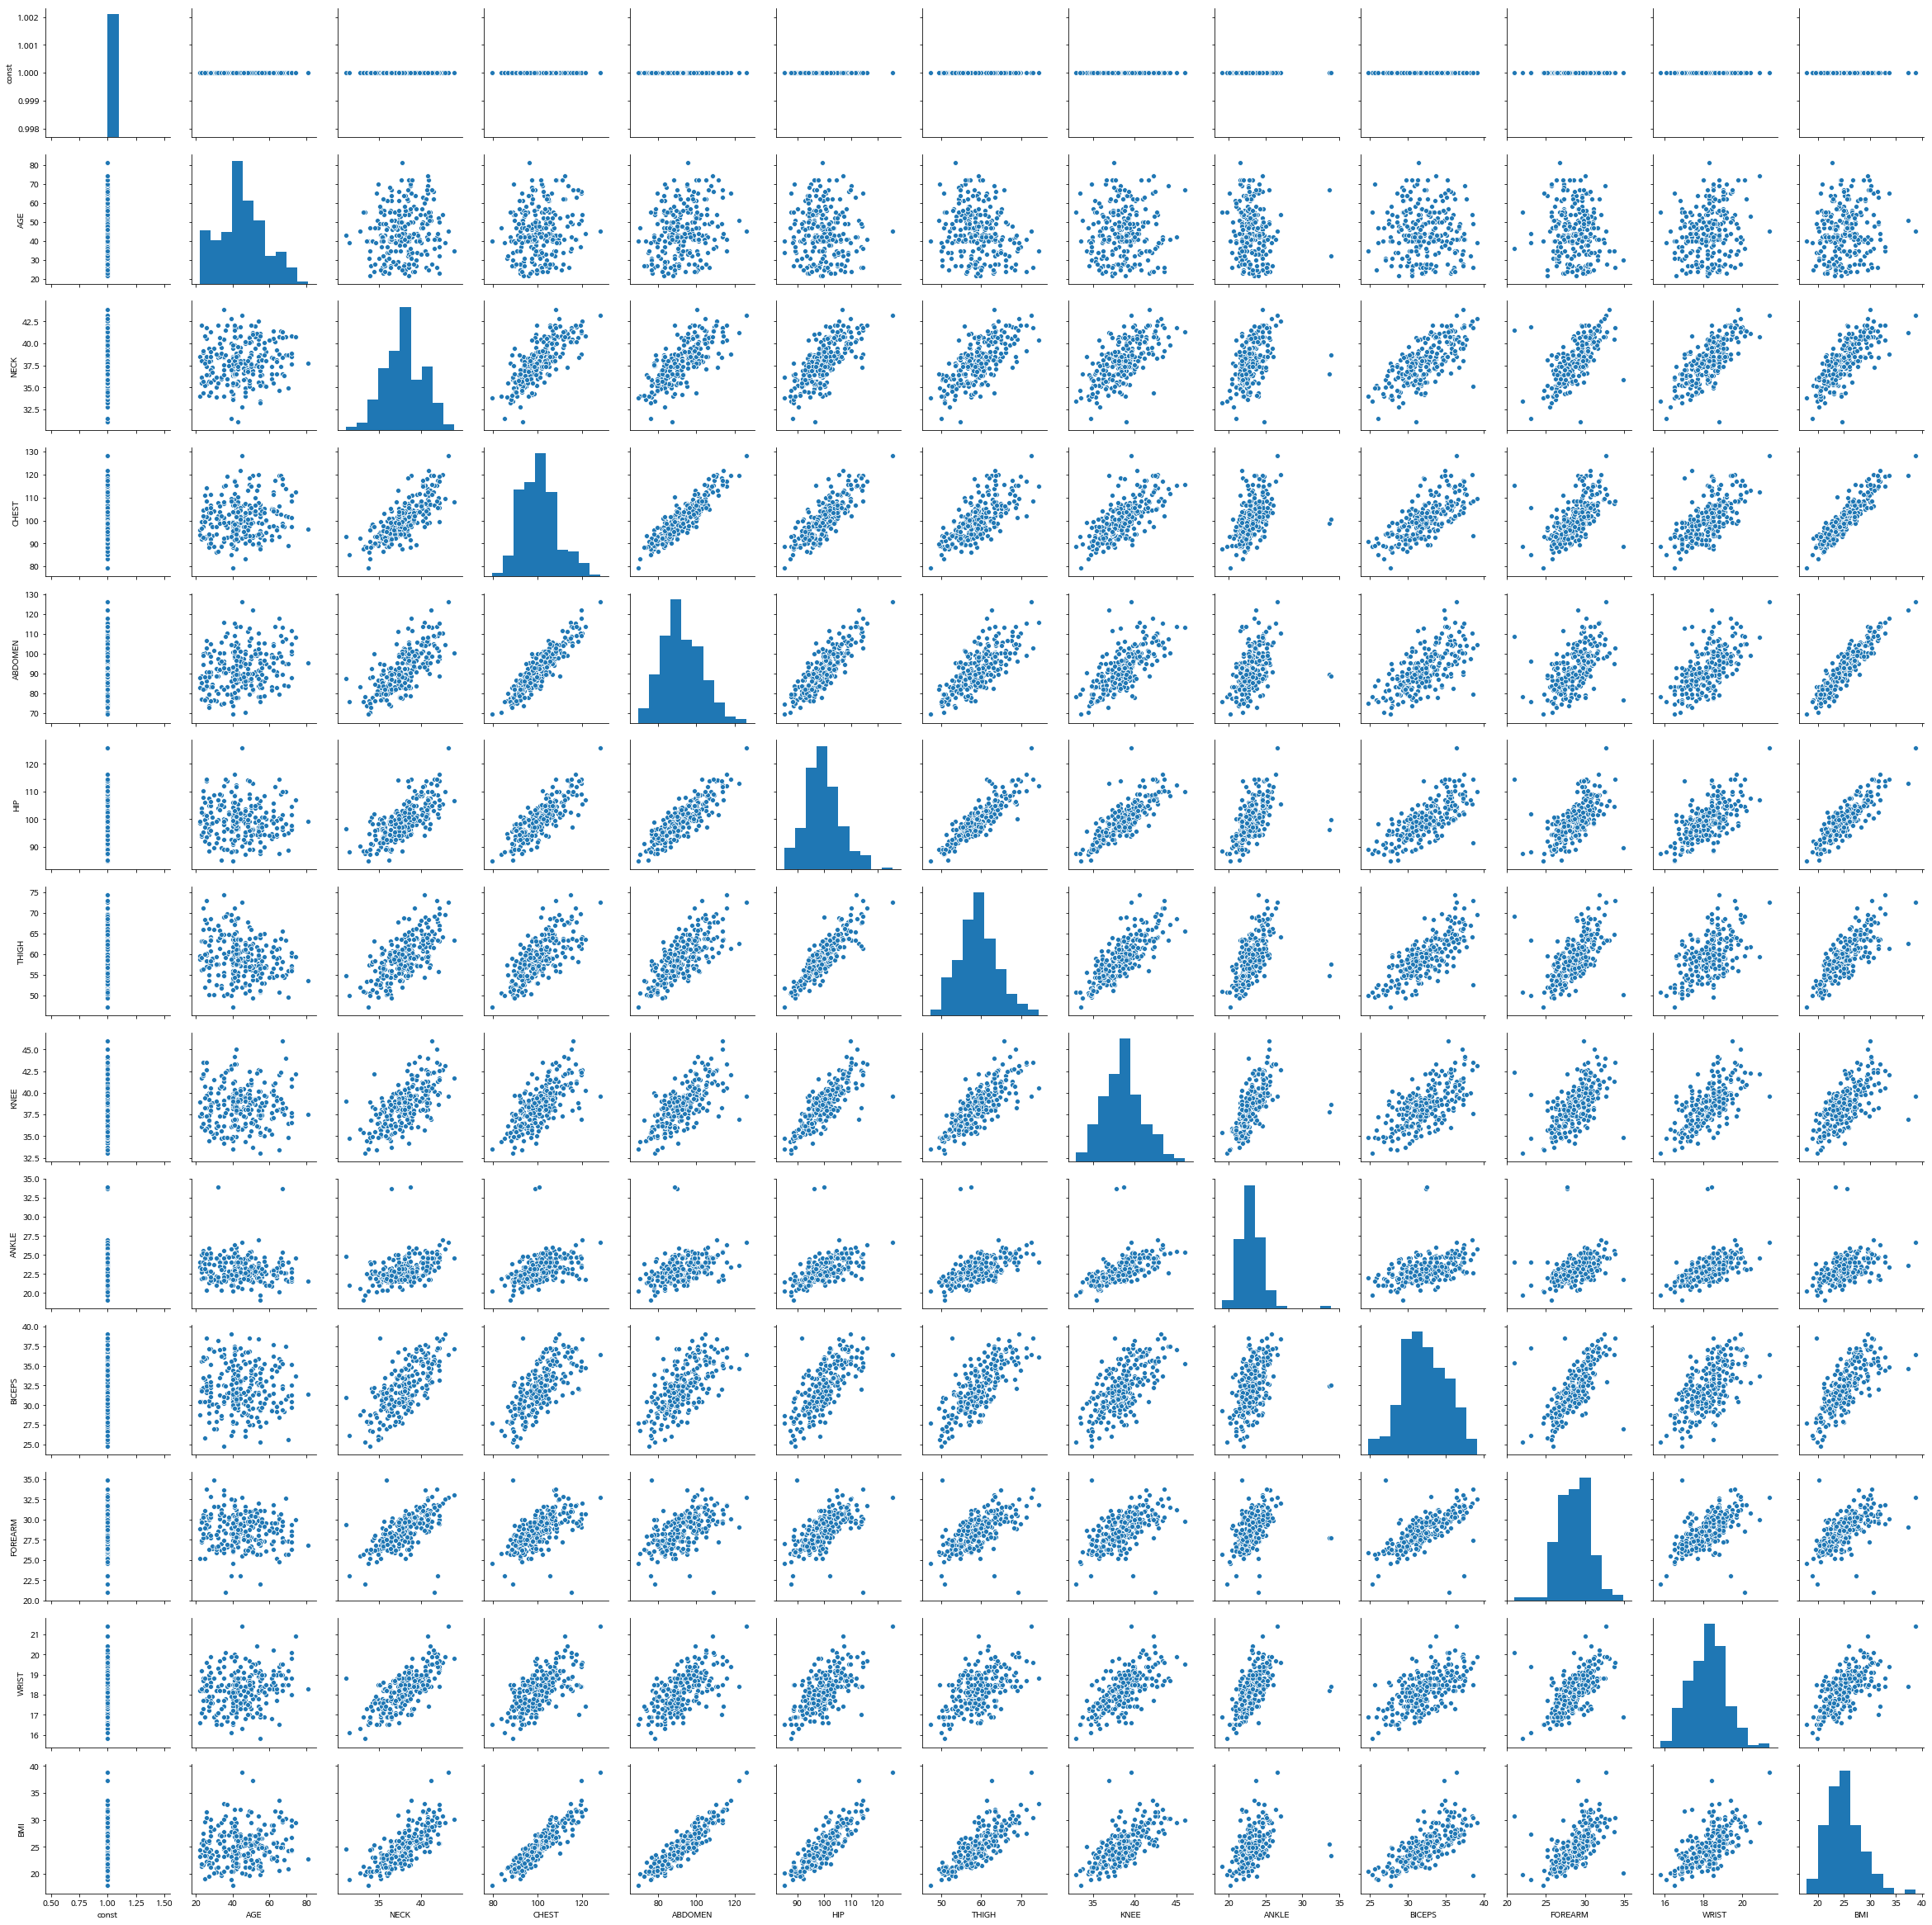

In [110]:
# STEP 2. 변수간의 경향성 파악 
# 산점도 행렬
sns.pairplot(df_health_x_const)


In [111]:
#회귀모델 생성
reg_multi_model = sm.OLS(df_health_y,df_health_x_const)
#적합
reg_multi_results = reg_multi_model.fit()
print(reg_multi_results.summary())


                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     59.44
Date:                Thu, 14 Feb 2019   Prob (F-statistic):           1.81e-64
Time:                        01:18:47   Log-Likelihood:                -709.53
No. Observations:                 250   AIC:                             1445.
Df Residuals:                     237   BIC:                             1491.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3520      7.592      0.441      0.6

In [112]:
#다중공정성확인
ds_vif = pd.DataFrame()
ds_vif["variable"] = df_health_x_const.columns
ds_vif["VIF"] = [variance_inflation_factor(df_health_x_const.values,i)for i in range(df_health_x_const.shape[1])]
#VIF가 낮은 순으로 정렬
ds_vif.sort_values("VIF",inplace= True)
ds_vif.round(3)


,variable,VIF
8,ANKLE,1.760
1,AGE,2.071
10,FOREARM,2.414
11,WRIST,3.101
9,BICEPS,3.294
2,NECK,3.682
7,KNEE,4.108
6,THIGH,7.061
3,CHEST,8.839
5,HIP,9.744


In [113]:
# STEP 5. 후진제거법을 이용한변수 선택
#RFE(Recursive feature elimination)함수:입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
#sklearn의 선형회귀 모델
model = LinearRegression()
#전체의 변수중 5개의 변수가 남을 때까지 변수 제거
rfe = RFE(estimator = model, n_features_to_select=5).fit(df_health_x,df_health_y)
#선택된 변수
selected_cols = df_health_x.columns[rfe.support_]
#제거된 변수
removed_cosl = df_health_x.columns[~rfe.support_]

print("Selected Variables :{}".format(selected_cols))
print("Removed Variables :{}".format(removed_cosl))


Selected Variables :Index(['NECK', 'ABDOMEN', 'HIP', 'WRIST', 'BMI'], dtype='object')
Removed Variables :Index(['AGE', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS', 'FOREARM'], dtype='object')


In [114]:
# 후진제거법을 이용한 변수선택 - 회귀모델 선택
# 후진제거법에 의하여 선택된 데이터(BMI를 포함한 5개의 변수를 설명변수로 최종선택)
df_health_x_rfe = sm.add_constant(df_health_x_const[selected_cols])
#회귀모델 생성
reg_multi_rfe_model = sm.OLS(df_health_y,df_health_x_rfe)
#적합
reg_multi_rfe_results = reg_multi_rfe_model.fit()
print(reg_multi_rfe_results.summary()) 


                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     135.7
Date:                Thu, 14 Feb 2019   Prob (F-statistic):           2.20e-68
Time:                        01:18:59   Log-Likelihood:                -716.86
No. Observations:                 250   AIC:                             1446.
Df Residuals:                     244   BIC:                             1467.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2123      7.024      0.600      0.5

C:\Users\znzla\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [115]:
# 후진제거법을 이용한 변수 선택 -선정된 변수들간의 다중공정성 확인
ds_rfe_vif = pd.DataFrame()
ds_rfe_vif["variable"] = df_health_x_rfe.columns
ds_rfe_vif["VIF"] = [variance_inflation_factor(df_health_x_rfe.values,i)for i in range(df_health_x_rfe.shape[1])]
ds_rfe_vif.sort_values("VIF",inplace=True)
ds_rfe_vif.round(3)


,variable,VIF
4,WRIST,2.266
1,NECK,3.186
3,HIP,4.644
2,ABDOMEN,7.021
5,BMI,7.451
0,const,664.323


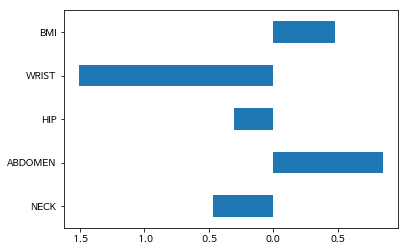

In [116]:
# STEP 6. 최종도출
df_reg_coef = pd.DataFrame({"Coef":reg_multi_rfe_results.params.values[1:]},index = reg_multi_rfe_model.exog_names[1:])
df_reg_coef.plot.barh(y = "Coef",legend = False)


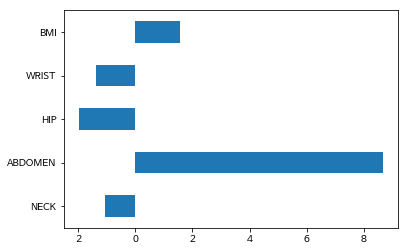

In [117]:
# 표준화 회귀계수를 이용한 변수 중요도 확인
# 왜냐하면, 변수간에도 중요도 차이가 있다. - 표준화(scaling 필요)

df_health_x_scaled = scale(df_health_x_const[selected_cols])

df_health_x_scaled = sm.add_constant(df_health_x_scaled)

reg_multi_scaled_model = sm.OLS(df_health_y,df_health_x_scaled)

reg_multi_scaled_results = reg_multi_scaled_model.fit()

# 회귀계수의 방향은 동일하나 중요도의 크기가 변함 , 허리둘레가 가장중요하고, WRIST의 중요도가 낮아짐
df_reg_scaled_coef = pd.DataFrame({"Coef":reg_multi_scaled_results.params.values[1:]},
index = reg_multi_rfe_model.exog_names[1:])
df_reg_scaled_coef.plot.barh(y="Coef", legend = False)


In [118]:
# 최종 회귀계수도출
# formula 함수를 적용
# 설명변수= BMI,WRIST,HIP,ABDOMEN,NECK
import statsmodels.formula.api as smf
formula_model = smf.ols(formula = "FAT~ NECK + ABDOMEN + WRIST + HIP + BMI " , data = df_health)
formula_result = formula_model.fit()
print(formula_result.summary())


                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     135.7
Date:                Thu, 14 Feb 2019   Prob (F-statistic):           2.20e-68
Time:                        01:19:17   Log-Likelihood:                -716.86
No. Observations:                 250   AIC:                             1446.
Df Residuals:                     244   BIC:                             1467.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2123      7.024      0.600      0.5

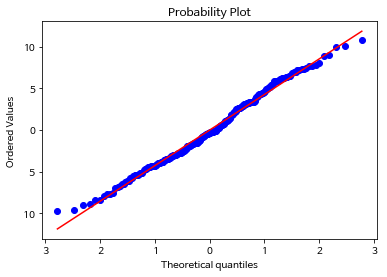

In [119]:
# 정규화(잔차검정)
# 정규성확인
stats.probplot(formula_result.resid, plot=plt)
plt.show()


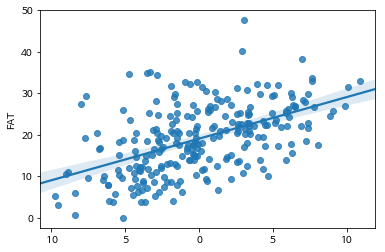

In [120]:
#등분산성검사
sns.regplot(formula_result.resid,df_health_y)

